## Python Basic

In [1]:
a = 3
b = 2
a + b

5

## BTC Investment
- https://www.coingecko.com/en/price_charts/bitcoin/usd#panel

### 資料蒐集

In [2]:
import requests
res = requests.get('https://www.coingecko.com/en/price_charts/bitcoin/usd/90_days.json')
res

<Response [200]>

### 資料整理

In [7]:
import pandas
df = pandas.DataFrame(res.json()['stats'])
df.columns = ['time', 'price']
df.index = df['time']
df.head()


,time,price
time,,
1.502410e+12,1.502410e+12,3562.59
1.502496e+12,1.502496e+12,3800.14
1.502582e+12,1.502582e+12,4023.25
1.502669e+12,1.502669e+12,4175.70
1.502755e+12,1.502755e+12,4149.31


### 資料視覺化

Populating the interactive namespace from numpy and matplotlib


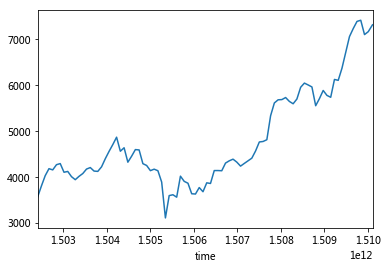

In [8]:
%pylab inline
df['price'].plot(kind = 'line')

### 計算均價

In [13]:
df['mvg'] = df['price'].rolling(window = 30).mean()

In [11]:
df.head(10)

,time,price,mvg
time,,,
1.502410e+12,1.502410e+12,3562.59,NaN
1.502496e+12,1.502496e+12,3800.14,NaN
1.502582e+12,1.502582e+12,4023.25,NaN
1.502669e+12,1.502669e+12,4175.70,NaN
1.502755e+12,1.502755e+12,4149.31,NaN
1.502842e+12,1.502842e+12,4262.56,NaN
1.502928e+12,1.502928e+12,4286.92,4037.210000
1.503014e+12,1.503014e+12,4097.69,4113.652857
1.503101e+12,1.503101e+12,4115.21,4158.662857


### 得到決策結果

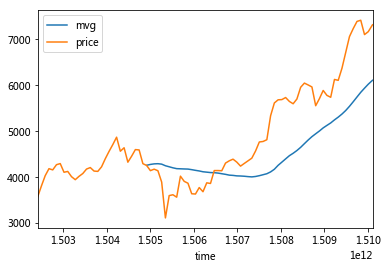

In [14]:
df[['mvg', 'price']].plot(kind = 'line')

## 資料蒐集

In [17]:
import requests
headers = {
    'User-Agent': 'QOO is coming'
}
res = requests.get('http://www.largitdata.com', headers = headers)
res

<Response [200]>

In [19]:
import requests
headers = {
  'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'  
}
res = requests.get('https://rent.591.com.tw/?kind=0&region=1', headers = headers)
#res.text

### 591 租屋資料抓取

In [23]:
import requests
headers = {
  'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'  
}
res = requests.get('https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5', headers = headers)
#res.json()

### 圖片抓取

In [24]:
res = requests.get('https://hp2.591.com.tw/house/active/2017/03/21/149007764913629709_210x158.crop.jpg')
with open('house.jpg', 'wb') as f:
    f.write(res.content)

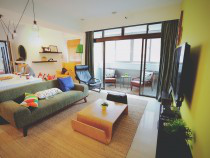

In [25]:
from PIL import Image
Image.open('house.jpg')

### 音樂抓取

In [26]:
import requests

res = requests.get('https://www.e-classical.com.tw/upload/music/20170928171211_mp3.mp3')
with open('music.mp3', 'wb') as f:
    f.write(res.content)